In [53]:
#!/usr/bin/python

import sys
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
from sklearn.feature_selection import SelectKBest
#sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
#features_list = ['poi','salary','bonus','total_stock_value','exercised_stock_options','total_payments','long_term_incentive'] # You will need to use more features
financial_features_list = ['poi','salary','bonus','deferral_payments','deferred_income','director_fees','exercised_stock_options','expenses','loan_advances','long_term_incentive','restricted_stock','restricted_stock_deferred','total_payments','total_stock_value']
email_feature_list = ['poi','to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)
print 'number of people in data set = ', len(data_dict)
print 'features for every person in the data set:\n', data_dict['LAY KENNETH L'].keys()

number of people in data set =  146
features for every person in the data set:
['salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']


In [19]:
### Task 2: Remove outliers
''' as seen in the outliers section, we saw that there was a "Total" entry in the data set that was a clear outlier.
thus we are removing it
'''
print "length of data set before removing outlier = ", len(data_dict)
data_dict.pop("TOTAL",0)
print "length of data set after removing outlier = ", len(data_dict)

length of data set before removing outlier =  146
length of data set after removing outlier =  145


In [20]:
# EDA for data set. Code to convert data set into a pandas df taken from:
#from post https://discussions.udacity.com/t/pickling-pandas-df/174753
import pandas
# Your code
print len(data_dict)
df = pandas.DataFrame.from_records(list(data_dict.values()))
employees = pandas.Series(list(data_dict.keys()))

# set the index of df to be the employees series:
df.set_index(employees, inplace=True)
                          
df.head()


145


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000,NaN,NaN,NaN,mark.metts@enron.com,NaN,94299,29,38,1,...,NaN,1740,False,585062,NaN,365788,702,807,1061827,585062
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
ELLIOTT STEVEN,350000,NaN,-400729,NaN,steven.elliott@enron.com,4890344,78552,NaN,NaN,NaN,...,NaN,12961,False,1788391,NaN,170941,NaN,NaN,211725,6678735
CORDES WILLIAM R,NaN,NaN,NaN,NaN,bill.cordes@enron.com,651850,NaN,12,10,0,...,NaN,NaN,False,386335,NaN,NaN,58,764,NaN,1038185
HANNON KEVIN P,1500000,NaN,-3117011,NaN,kevin.hannon@enron.com,5538001,34039,32,32,21,...,1617011,11350,True,853064,NaN,243293,1035,1045,288682,6391065


In [5]:
# convert strings to numbers and replace NaN with 0
df_calculations = df.apply(pandas.to_numeric, errors='coerce').fillna(0)
df_calculations.head()



,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
METTS MARK,600000.0,0.0,0.0,0.0,0.0,0.0,94299.0,29.0,38.0,1.0,...,0.0,1740.0,False,585062.0,0.0,365788.0,702.0,807.0,1061827.0,585062.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,0.0,0.0,6680544.0,11200.0,0.0,0.0,0.0,...,1586055.0,2660303.0,False,3942714.0,0.0,267102.0,0.0,0.0,5634343.0,10623258.0
ELLIOTT STEVEN,350000.0,0.0,-400729.0,0.0,0.0,4890344.0,78552.0,0.0,0.0,0.0,...,0.0,12961.0,False,1788391.0,0.0,170941.0,0.0,0.0,211725.0,6678735.0
CORDES WILLIAM R,0.0,0.0,0.0,0.0,0.0,651850.0,0.0,12.0,10.0,0.0,...,0.0,0.0,False,386335.0,0.0,0.0,58.0,764.0,0.0,1038185.0
HANNON KEVIN P,1500000.0,0.0,-3117011.0,0.0,0.0,5538001.0,34039.0,32.0,32.0,21.0,...,1617011.0,11350.0,True,853064.0,0.0,243293.0,1035.0,1045.0,288682.0,6391065.0


In [6]:
poi_financial_df=df_calculations[['poi','salary','bonus','deferral_payments','deferred_income','director_fees','exercised_stock_options','expenses','loan_advances','long_term_incentive','restricted_stock','restricted_stock_deferred','total_payments','total_stock_value']]
poi_financial_df.head()

,poi,salary,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,loan_advances,long_term_incentive,restricted_stock,restricted_stock_deferred,total_payments,total_stock_value
METTS MARK,False,365788.0,600000.0,0.0,0.0,0.0,0.0,94299.0,0.0,0.0,585062.0,0.0,1061827.0,585062.0
BAXTER JOHN C,False,267102.0,1200000.0,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.0,1586055.0,3942714.0,0.0,5634343.0,10623258.0
ELLIOTT STEVEN,False,170941.0,350000.0,0.0,-400729.0,0.0,4890344.0,78552.0,0.0,0.0,1788391.0,0.0,211725.0,6678735.0
CORDES WILLIAM R,False,0.0,0.0,0.0,0.0,0.0,651850.0,0.0,0.0,0.0,386335.0,0.0,0.0,1038185.0
HANNON KEVIN P,True,243293.0,1500000.0,0.0,-3117011.0,0.0,5538001.0,34039.0,0.0,1617011.0,853064.0,0.0,288682.0,6391065.0


In [7]:
poi_financial_df['salary_bonus_ratio'] = poi_financial_df['bonus']/poi_financial_df['salary']
poi_financial_df['total_stock_exercised_ratio'] = poi_financial_df['total_stock_value']/poi_financial_df['exercised_stock_options']
poi_financial_df.head()

C:\Users\nmeli\Documents\Udacity\Data Analysis\Anacondas\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\nmeli\Documents\Udacity\Data Analysis\Anacondas\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,poi,salary,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,loan_advances,long_term_incentive,restricted_stock,restricted_stock_deferred,total_payments,total_stock_value,salary_bonus_ratio,total_stock_exercised_ratio
METTS MARK,False,365788.0,600000.0,0.0,0.0,0.0,0.0,94299.0,0.0,0.0,585062.0,0.0,1061827.0,585062.0,1.640294,inf
BAXTER JOHN C,False,267102.0,1200000.0,1295738.0,-1386055.0,0.0,6680544.0,11200.0,0.0,1586055.0,3942714.0,0.0,5634343.0,10623258.0,4.492666,1.590179
ELLIOTT STEVEN,False,170941.0,350000.0,0.0,-400729.0,0.0,4890344.0,78552.0,0.0,0.0,1788391.0,0.0,211725.0,6678735.0,2.047490,1.365698
CORDES WILLIAM R,False,0.0,0.0,0.0,0.0,0.0,651850.0,0.0,0.0,0.0,386335.0,0.0,0.0,1038185.0,NaN,1.592675
HANNON KEVIN P,True,243293.0,1500000.0,0.0,-3117011.0,0.0,5538001.0,34039.0,0.0,1617011.0,853064.0,0.0,288682.0,6391065.0,6.165405,1.154038


poi                            1.000000
salary                         0.341365
bonus                          0.360262
deferral_payments             -0.038267
deferred_income               -0.275364
director_fees                 -0.120001
exercised_stock_options        0.388241
expenses                       0.206580
loan_advances                  0.220405
long_term_incentive            0.258301
restricted_stock               0.249352
restricted_stock_deferred     -0.021229
total_payments                 0.242922
total_stock_value              0.384127
salary_bonus_ratio             0.199132
total_stock_exercised_ratio   -0.026580
Name: poi, dtype: float64


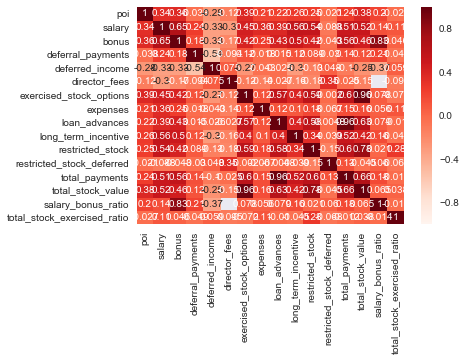

In [8]:
print poi_financial_df.corr()['poi']
sns.heatmap(poi_financial_df.corr(),vmax=1,annot=True,cbar=True,cmap='Reds')


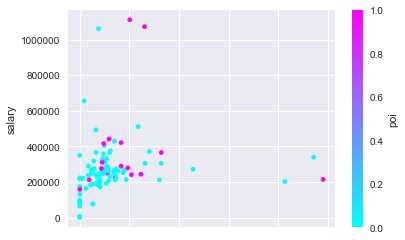

In [9]:
poi_financial_df.plot(kind = 'scatter', x = 'salary_bonus_ratio', y = 'salary', c ='poi', cmap = 'cool')

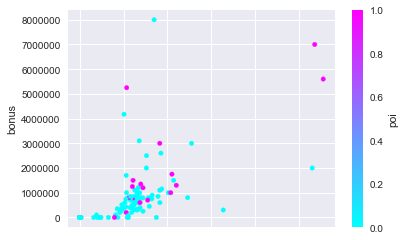

In [61]:
poi_financial_df.plot(kind = 'scatter', x = 'salary', y = 'bonus', c ='poi', cmap = 'cool')

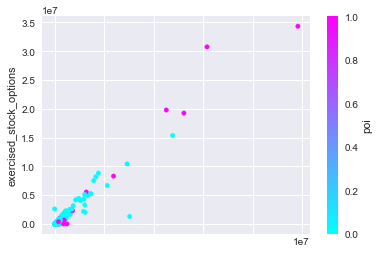

In [51]:
poi_financial_df.plot(kind = 'scatter', x = 'total_stock_value', y = 'exercised_stock_options', c ='poi', cmap = 'cool')

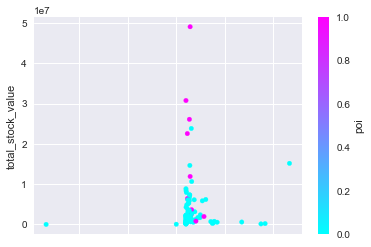

In [65]:
poi_financial_df.plot(kind = 'scatter', x = 'total_stock_exercised_ratio', y = 'total_stock_value', c ='poi', cmap = 'cool')

In [47]:
### Task 3: Create new feature(s)


### Store to my_dataset for easy export below.
my_dataset = data_dict


In the next cell, i am going to extract the features i defined in my list above and select the top 4 features from the financial features and from the email features to help aid my classifier. 

In [54]:
### Extract features and labels from dataset for local testing
from sklearn.feature_selection import SelectKBest
import numpy
# extract the 4 strongest features from the financial data with SelectKBest
financial_data = featureFormat(my_dataset, financial_features_list, sort_keys = True)
labels, financial_features = targetFeatureSplit(financial_data)

# select 4 best features using SelectKBest
test1 = SelectKBest(k=4)
fit1 = test1.fit(financial_features,labels)

#numpy.set_printoptions(precision=10)
print "printing financial_features k scores: \n", (fit1.scores_)

feature = fit.transform(features)
# summarize selected features
#print(feature)

#print features
#print labels
print feature_list[3]

#extract the 4 strongest features from email data with SelectKBest
email_data = featureFormat(my_dataset, email_feature_list, sort_keys = True)
labels, email_features = targetFeatureSplit(email_data)

test2 = SelectKBest(k=4)
fit2 = test2.fit(email_features,labels)

print "printing email_features k scores: \n", (fit2.scores_)

printing financial_features k scores: 
[  1.6005424570e-04   7.7948855777e-02   2.3899588985e-01
   2.1950572394e-01   5.4908420148e-01   2.2826733729e-01
   1.3978413822e-02   2.5182610445e+00   2.2229270862e-02
   3.1333216298e-02   4.1731922805e-03   3.4962715304e-01
   1.6611912321e-01]
deferral_payments
printing email_features k scores: 
[ 0.2929686938  2.4313789112  0.4664001643  1.085306903   4.6194573159]


After running SelectKBest seperately on the Finanical Data and Email Data. The following features were identified as the top 4 from each group:
* Financial Data:
    - loan_advances
    - director_fees
    - total_payments
    - deferral_payments
* Email Data:
    - shared_receipt_with_poi
    - from_poi_to_this_person
    - from_this_person_to_poi
    - from_messages



Now i am going to combine these feature to extract the top overal features from this set

In [59]:
financial_email_features = ['poi','loan_advances','director_fees','total_payments','deferral_payments','shared_receipt_with_poi','from_poi_to_this_person','from_this_person_to_poi','from_messages']
financial_email_data = featureFormat(my_dataset, financial_email_features, sort_keys = True)
labels, financial_email_features = targetFeatureSplit(financial_email_data)

# select 4 best features using SelectKBest
test3 = SelectKBest(k=4)
fit3 = test3.fit(financial_email_features,labels)

#numpy.set_printoptions(precision=10)
print "printing financial_email_features k scores: \n", (fit3.scores_)


printing financial_email_features k scores: 
[ 2.302744875   0.5867389145  0.2867224336  0.2691878063  7.6532156586
  4.6402556506  2.1218670062  0.2061171651]


After running SelectKBest on the top 4 features from each group combined, I observed the following K scores:

Feature 	               Score
- 'shared_receipt_with_poi'	7.65
- 'from_poi_to_this_person'	4.64
- 'loan_advances'	        2.30
- 'from_this_person_to_poi'	2.12
- 'director_fees'	        0.59
- 'total_payments'	        0.29
- 'deferral_payments'	    0.27
- 'from_messages'	        0.21


Interesting enough, features from the email data seem to be the best features to use when input them into our classifier. I'm going to compare this when I run SelectKBest on all features and also to S

In [60]:
full_feature_list = ['poi','salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees','to_messages','from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']
full_data = featureFormat(my_dataset, full_feature_list, sort_keys = True)
labels, full_features = targetFeatureSplit(full_data)

# select 4 best features using SelectKBest
test4 = SelectKBest(k=4)
fit4 = test4.fit(full_features,labels)

#numpy.set_printoptions(precision=10)
print "printing full_features k scores: \n", (fit4.scores_)


printing full_features k scores: 
[  1.6005424570e-04   2.3899588985e-01   3.4962715304e-01
   2.5182610445e+00   7.7948855777e-02   4.1731922805e-03
   2.1950572394e-01   1.6611912321e-01   1.3978413822e-02
   2.2826733729e-01   6.8194519160e-02   2.2229270862e-02
   3.1333216298e-02   5.4908420148e-01   1.7516942790e+00
   5.4466874833e+00   1.5877023921e-01   2.4705212227e+00
   8.9038215572e+00]


After running SelectKBest on the entire feature list, excluding email address, I observed the following K scores:
Feature 	Score
- 'shared_receipt_with_poi'	8.90382156
- 'from_poi_to_this_person'	5.44668748
- 'loan_advances'	2.51826104
- 'from_this_person_to_poi'	2.47052122
- 'to_messages'	1.75169428
- 'director_fees'	0.54908420
- 'total_payments'	0.34962715
- 'deferral_payments'	0.23899589
- 'exercised_stock_options'	0.22826734
- 'deferred_income'	0.21950572
- 'total_stock_value'	0.16611912
- 'from_messages'	0.15877024
- bonus'	0.07794886
- 'other'	0.06819452
- 'restricted_stock'	0.03133322
- 'long_term_incentive'	0.02222927
- 'expenses'	0.01397841
- 'restricted_stock_deferred'	0.00417319
- 'salary'	0.00016005

As seen, the top 4 features from this list is the same when I picked out the top 4 features from each group and ran SelectKBest on the combined list. Lets see if this is the same when using Selectpercentile


In [64]:
from sklearn.feature_selection import SelectPercentile, f_classif
test5 =  SelectPercentile(f_classif, percentile=10)
fit5 = test5.fit(full_features,labels)

#numpy.set_printoptions(precision=10)
print "printing full_features k scores: \n", (fit5.scores_)


printing full_features k scores: 
[  1.6005424570e-04   2.3899588985e-01   3.4962715304e-01
   2.5182610445e+00   7.7948855777e-02   4.1731922805e-03
   2.1950572394e-01   1.6611912321e-01   1.3978413822e-02
   2.2826733729e-01   6.8194519160e-02   2.2229270862e-02
   3.1333216298e-02   5.4908420148e-01   1.7516942790e+00
   5.4466874833e+00   1.5877023921e-01   2.4705212227e+00
   8.9038215572e+00]


After running SelectPercentile, I get the same scores as I did with SelectKBest. I think i found the features i want to use with my classifier. 

In [ ]:
### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

### Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html




In [ ]:
# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

In [ ]:
### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)